# Aula 01: Dados com Muitas Dimensões

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/reducao-dimensionalidade/master/data-set/exames.csv')
df.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Separando as variáveis e o alvo

In [6]:
valores_exames = df.drop(['id','diagnostico'],axis=1)
diagnostico = df.diagnostico

Importando SKLearn para realizar o split entre teste e treino

In [7]:
from sklearn.model_selection import train_test_split
from numpy import random

In [8]:
SEED = 10
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exames,diagnostico)

In [9]:
print("Tamanho do Dataset",train_x.shape[0]+test_x.shape[0])
print("Percentual de dados de teste",(test_x.shape[0]/(train_x.shape[0]+test_x.shape[0])*100))

Tamanho do Dataset 569
Percentual de dados de teste 25.13181019332162


Vamos utilizar o modelo de random forest (árvores de decisão)

In [10]:
from sklearn.ensemble import RandomForestClassifier

**Nota:** Existem dados faltantes, logo, vamos ter que voltar um passo atrás e realizar a adequação dos valores. Utilizando o método .info podemos visualizar em qual lugar estão os dados vazios. Para completar, posso utilizar o método fillna.

In [11]:
df.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

Dados faltantes no exame_33. Vamos retirar esta coluna (instruções do curso)

In [12]:
valores_exames = df.drop(['id','diagnostico','exame_33'],axis=1)
diagnostico = df.diagnostico

In [13]:
SEED = 123143
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exames,diagnostico,test_size=0.3)

In [14]:
classificador = RandomForestClassifier(n_estimators=100)

classificador.fit(train_x,train_y)
print("Acurária da classificação: ",(100*classificador.score(test_x,test_y)))


Acurária da classificação:  92.39766081871345


Vamos realizar o teste de baseline

In [15]:
from sklearn.dummy import DummyClassifier

In [16]:
classificador_dummy = DummyClassifier(strategy='most_frequent')
classificador_dummy.fit(train_x,train_y)
print("Acurária do baseline: ",(100*classificador_dummy.score(test_x,test_y)))

Acurária do baseline:  66.66666666666666


Temos uma baseline de 66,66% para o valor mais frequente e o nosso classificado com árvore de decisão, temos 92,39%. Um bom algoritmo (não validado a hipótese de estar ocorrendo o sobre ajuste)

#Aula 02: Avançando e Explorando Dados

In [17]:
dados_plot = pd.concat([diagnostico, valores_exames], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")

dados_plot.head()

,diagnostico,exames,valores
0,M,exame_1,17.99
1,M,exame_1,20.57
2,M,exame_1,19.69
3,M,exame_1,11.42
4,M,exame_1,20.29


Realizando ordenação das colunas de exames (validar no [artigo de Tidy](https://vita.had.co.nz/papers/tidy-data.pdf) para transformação de dados)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10'),
  Text(10, 0, 'exame_11'),
  Text(11, 0, 'exame_12'),
  Text(12, 0, 'exame_13'),
  Text(13, 0, 'exame_14'),
  Text(14, 0, 'exame_15'),
  Text(15, 0, 'exame_16'),
  Text(16, 0, 'exame_17'),
  Text(17, 0, 'exame_18'),
  Text(18, 0, 'exame_19'),
  Text(19, 0, 'exame_20'),
  Text(20, 0, 'exame_21'),
  Text(21, 0, 'exame_22'),
  Text(22, 0, 'exame_23'),
  Text(23, 0, 'exame_24'),
  Text(24, 0, 'exame_25'),
  Text(25, 0, 'exame_26'),
  Text(26, 0, 'exame_27'),
  Text(27, 0, 'exame_28'),
  Text(28, 0, 'exame_29'),
  Text(29, 0, 'exame_30'),
  Text(30, 0, 'exame_31'),
  Text(31, 0, 'exame_32')])

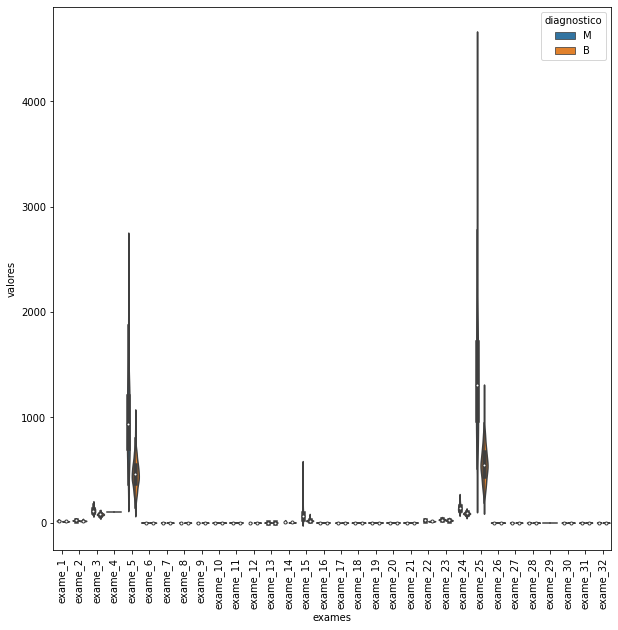

In [18]:
plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot)
plt.xticks(rotation = 90)


Visualização muito poluída. Gráfico ruim de visualizar. Vamos então padronizar e limitar os dados (StandardScaler)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'exame_1'),
  Text(1, 0, 'exame_2'),
  Text(2, 0, 'exame_3'),
  Text(3, 0, 'exame_4'),
  Text(4, 0, 'exame_5'),
  Text(5, 0, 'exame_6'),
  Text(6, 0, 'exame_7'),
  Text(7, 0, 'exame_8'),
  Text(8, 0, 'exame_9'),
  Text(9, 0, 'exame_10')])

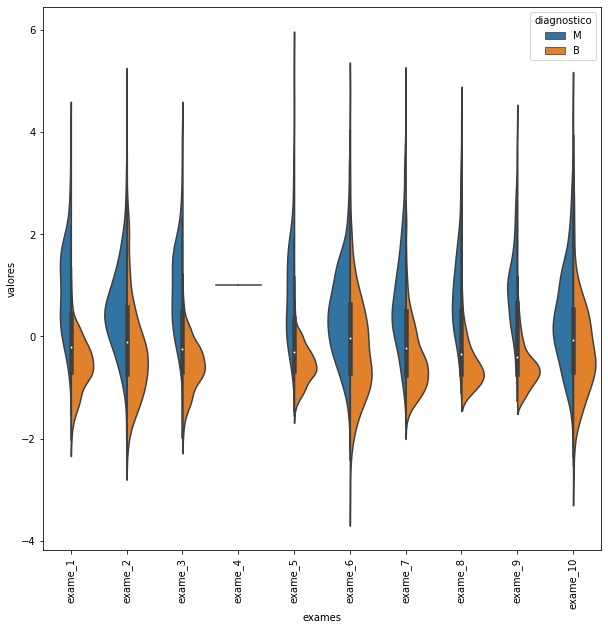

In [19]:
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames)
valores_exames_v2 = padronizador.transform(valores_exames)
valores_exames_v2 = pd.DataFrame(valores_exames_v2,
                                 columns=valores_exames.columns)

dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                 var_name="exames",
                 value_name="valores")


plt.figure(figsize=(10,10))
sns.violinplot(x = "exames", y = "valores", 
               hue = "diagnostico", data = dados_plot,
               split=True)
plt.xticks(rotation = 90)

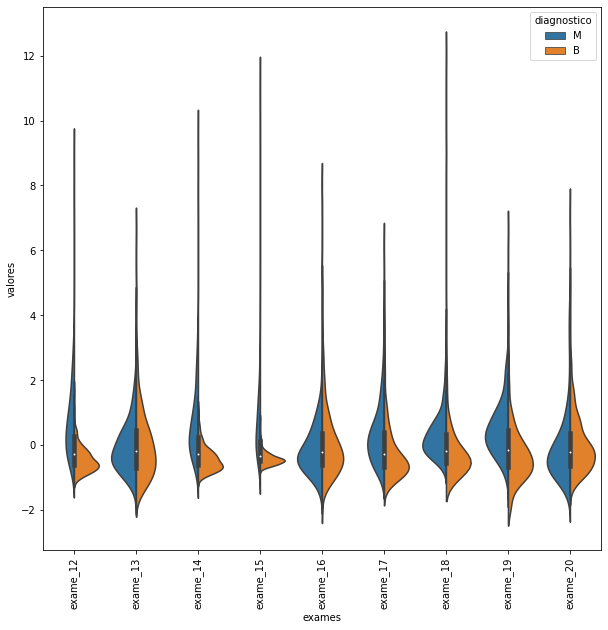

In [20]:
def grafico_violino(valores,diagnostico,inicio,fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", 
                  var_name="exames",
                  value_name="valores")


  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y = "valores", 
                hue = "diagnostico", data = dados_plot,
                split=True)
  plt.xticks(rotation = 90)

grafico_violino(valores_exames_v2,diagnostico,11,20)


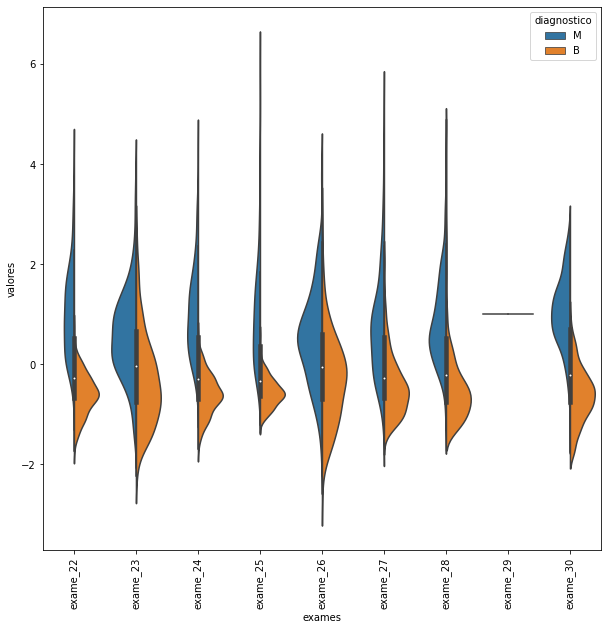

In [21]:
grafico_violino(valores_exames_v2,diagnostico,21,30)

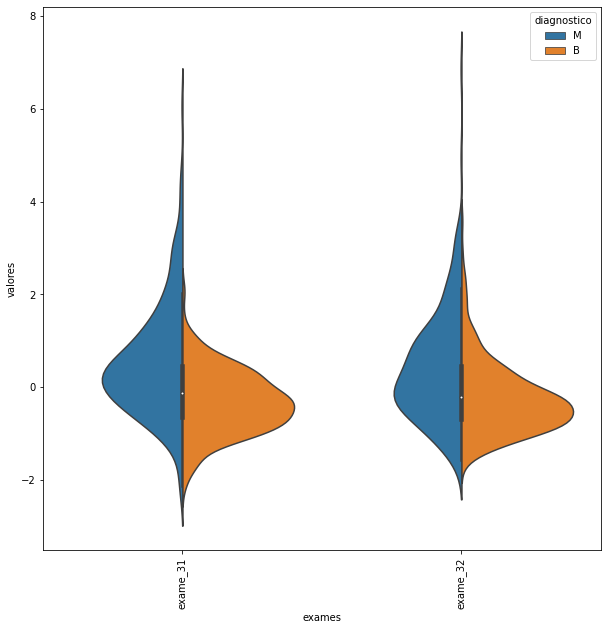

In [22]:
grafico_violino(valores_exames_v2,diagnostico,30,33)

Exame_4 e Exame_29 é um dado estranho. Devemos analisar, pois aparenta ser uma reta (valor constante)

In [23]:
valores_exames.exame_4.std()

1.422335876928432e-14

In [24]:
valores_exames.exame_29.std()

1.1111999038503376e-16

Possui baixíssimo desvio padrão, esta variável não agrega ao nosso modelo. Vou puxar todos os dados do dataset para avaliarmos se há mais algum coluna que pode ser descartada.

In [25]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4','exame_29'])

In [26]:
def classificar(valores):
    SEED = 1234
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size = 0.3)

    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print("Resultado da classificação %.2f%%" % (classificador.score(teste_x, teste_y)* 100))

In [27]:
classificar(valores_exames)
classificar(valores_exames_v2)
classificar(valores_exames_v3)

Resultado da classificação 92.40%
Resultado da classificação 92.40%
Resultado da classificação 92.98%


#Aula 03: Dados Correlacionados

Vamos visualizar a correlação dos dados dos exames.

<AxesSubplot:>

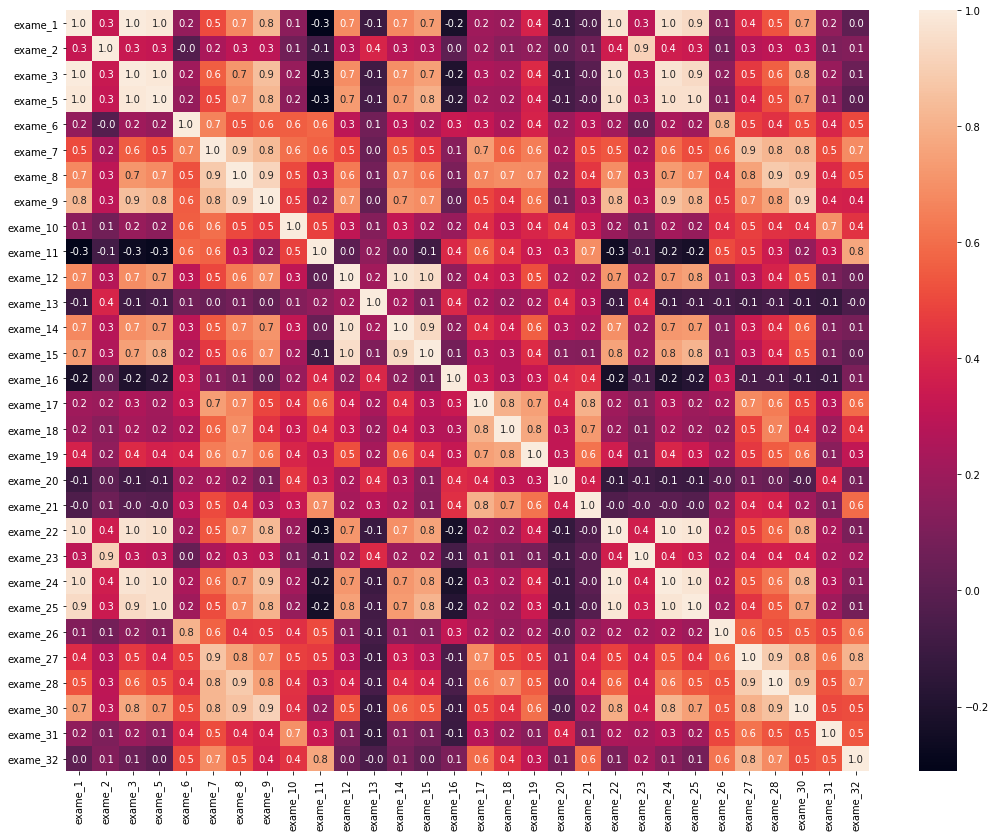

In [28]:
matriz_correlacao = valores_exames_v3.corr()

plt.figure(figsize=(18,14))
sns.heatmap(matriz_correlacao,annot=True,fmt=".1f")

In [29]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao>0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
matriz_correlacao_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

Tudo que for maior que 1 possui uma correlação muito alta. Vamos retirar estes parâmetros dos dados

In [30]:
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2>1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [31]:
valores_exames_v4 = valores_exames_v3.drop(columns=variaveis_correlacionadas.index)
valores_exames_v4.head()

,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,exame_13,...,exame_20,exame_21,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,...,1.148757,0.907083,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,...,-0.805450,-0.099444,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,...,0.237036,0.293559,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,...,4.732680,2.047511,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,...,-0.361092,0.499328,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [32]:
classificar(valores_exames_v4)

Resultado da classificação 91.81%


Obtemos um resultado menor do que o esperado. Vamos retornar aos valores e retirar os parâmetros que possuem alta correlação, deixando um deles ainda.

In [33]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3','exame_24'])

In [34]:
classificar(valores_exames_v5)

Resultado da classificação 92.98%


##Correlação e Causalidade

"Temos que ter bastante cuidado ao analisarmos correlações, pois podemos tirar certas conclusões que às vezes não fazem muito sentido. Por exemplo, poderíamos ter concluído que, como "exame_1" e "exame_3" estão altamente correlacionados, o alto valor de "exame_3" é causado por "exame_1". Porém, a associação de correlação e causalidade nem sempre é verdadeira. "

Site para visualizar correlações "engraçadas": https://www.tylervigen.com/spurious-correlations

# Aula 04: Automatizando a Seleção

Há uma função que realizar a seleção automática dos melhores parâmetros.

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [36]:
selecionar_kmelhores = SelectKBest(chi2,k=5)

Chi2 não suporta dados negativos em sua entrada. Temos que realizar a normalização (temos que usar o V1)

In [37]:
valores_exames_v6 = valores_exames.drop(columns=['exame_4','exame_29','exame_3','exame_24'])
valores_exames_v6

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,17.99,10.38,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,...,0.006193,25.380,17.33,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,...,0.003532,24.990,23.41,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,...,0.004571,23.570,25.53,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,...,0.009208,14.910,26.50,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,...,0.005115,22.540,16.67,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,...,0.004239,25.450,26.40,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,...,0.002498,23.690,38.25,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,...,0.003892,18.980,34.12,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,...,0.006185,25.740,39.42,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [38]:
SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6,diagnostico,test_size=0.3)

selecionar_kmelhores.fit(train_x,train_y)
treino_kbest = selecionar_kmelhores.transform(train_x)
teste_kbest = selecionar_kmelhores.transform(test_x)

In [39]:
treino_kbest.shape

(398, 5)

In [40]:
classificador = RandomForestClassifier(n_estimators=100,random_state=1234)
classificador.fit(treino_kbest,train_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, test_y)* 100))

Resultado da classificação 92.40%


Realizando a visualização da matriz de confusão

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
matriz_confusao = confusion_matrix(test_y,classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]], dtype=int64)

[Text(0.5, 25.5, 'Predição'), Text(61.5, 0.5, 'Real')]

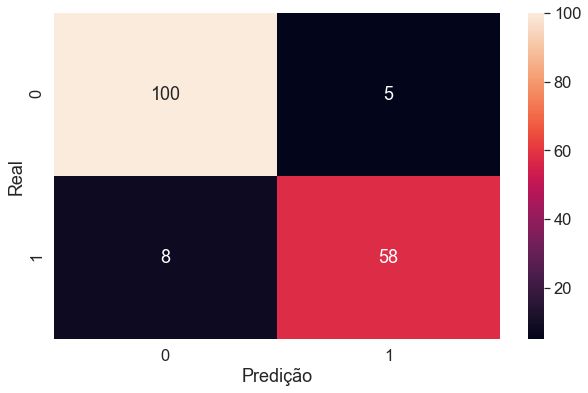

In [43]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao,annot=True,fmt='d').set(xlabel="Predição",ylabel="Real")

A soma de [0,0] e [0,1] é o número de casos reais, dos quais a predição avalia corretamente 100 casos e erra 5 casos. A análise também pode ser realizada para os casos [1,0] e [1,1].

Considerar coordenadas como [Real,Predição].

Vamos utilizar o RFE (Recursive Feature Elimination) para realizar alguns testes

In [44]:
from sklearn.feature_selection import RFE

In [45]:
SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6,diagnostico,test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100,random_state=1234)

selecionar_rfe = RFE(estimator=classificador,n_features_to_select=5,step=1)
selecionar_rfe.fit(train_x,train_y)
treino_rfe = selecionar_rfe.transform(train_x)
teste_rfe = selecionar_rfe.transform(test_x)

In [46]:
classificador.fit(treino_rfe,train_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, test_y)* 100))

Resultado da classificação 90.06%


In [47]:
matriz_confusao = confusion_matrix(test_y,classificador.predict(teste_rfe))
matriz_confusao

array([[100,   5],
       [ 12,  54]], dtype=int64)

[Text(0.5, 25.5, 'Predição'), Text(61.5, 0.5, 'Real')]

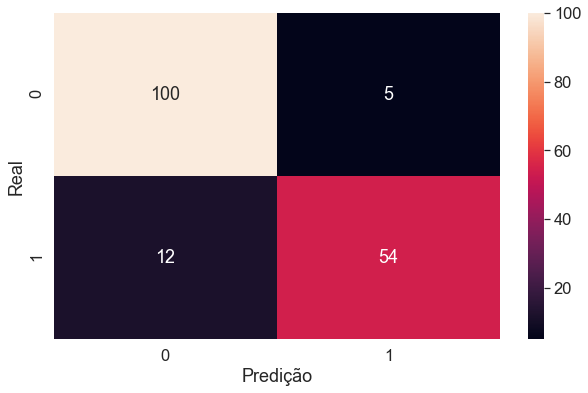

In [48]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao,annot=True,fmt='d').set(xlabel="Predição",ylabel="Real")

# Aula 05: Visualizando dados no plano

In [49]:
from sklearn.feature_selection import RFECV

In [50]:
SEED = 1234
random.seed(SEED)

train_x, test_x, train_y, test_y = train_test_split(valores_exames_v6,diagnostico,test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100,random_state=1234)

selecionar_rfecv = RFECV(estimator=classificador,cv=5,scoring = "accuracy",step=1)
selecionar_rfecv.fit(train_x,train_y)
treino_rfecv = selecionar_rfe.transform(train_x)
teste_rfecv = selecionar_rfe.transform(test_x)

In [51]:
classificador.fit(treino_rfe,train_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, test_y)* 100))

Resultado da classificação 90.06%


In [52]:
matriz_confusao = confusion_matrix(test_y,classificador.predict(teste_rfecv))
matriz_confusao

array([[100,   5],
       [ 12,  54]], dtype=int64)

[Text(0.5, 25.5, 'Predição'), Text(61.5, 0.5, 'Real')]

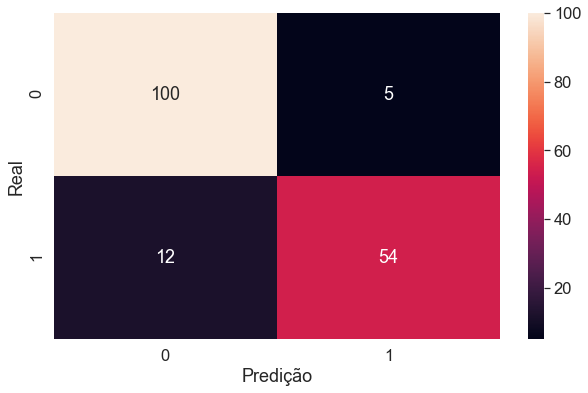

In [53]:
plt.figure(figsize=(10,6))
sns.set(font_scale=1.5)
sns.heatmap(matriz_confusao,annot=True,fmt='d').set(xlabel="Predição",ylabel="Real")

In [56]:
train_x.columns[selecionar_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [57]:
len(selecionar_rfecv.grid_scores_)

28

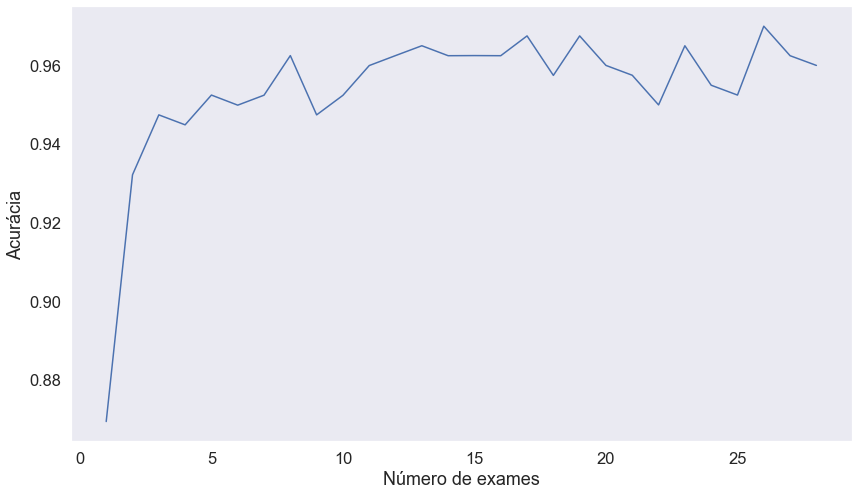

In [61]:
plt.figure(figsize=(14,8))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")
plt.grid()
plt.plot(range(1, len(selecionar_rfecv.grid_scores_) + 1), selecionar_rfecv.grid_scores_)

Os valores que nos retorna é uma média de acurácia entre os exames executados

In [63]:
valores_exames_v7 = selecionar_rfe.transform(valores_exames_v6)

<AxesSubplot:>

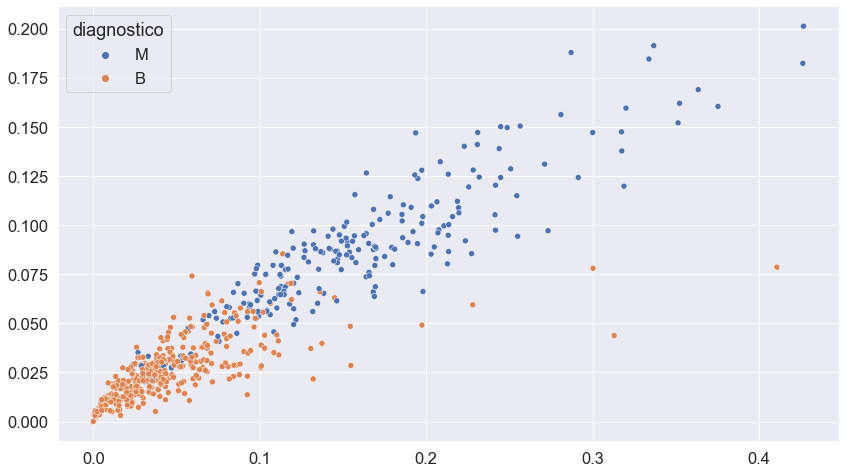

In [64]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v7[:,0] , y=valores_exames_v7[:,1] , hue=diagnostico)

Temos uma visão de duas dimensões plotadas acima (duas primeiras features). Não é o mais adequado. 

Transformar através do PCA a redução de variáveis para melhorar a nossa visualização. É melhor utilizar dados normalizados. Se torna mais fácil e claro de ver.

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components =2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

In [72]:
valores_exames_v8

array([[ 8.96150504,  1.20129074],
       [ 1.44812702, -3.54148886],
       [ 5.24751143, -1.46792042],
       ...,
       [ 0.87829285, -1.93369918],
       [10.0242535 ,  0.84654838],
       [-5.04091294, -0.5352433 ]])

<AxesSubplot:>

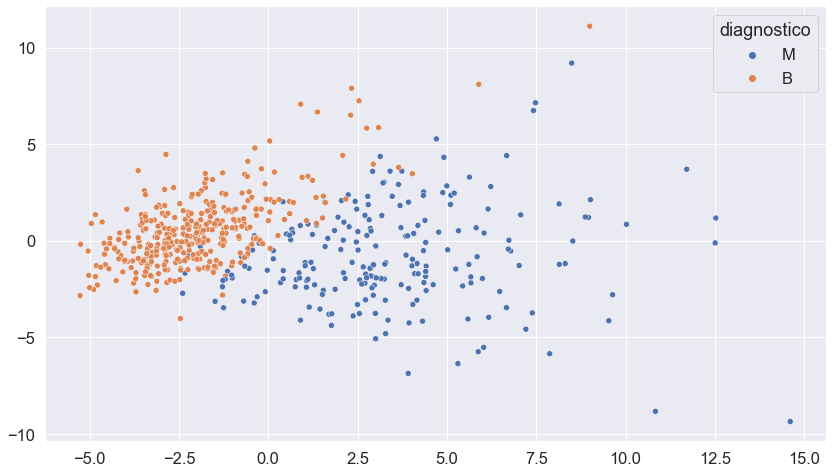

In [73]:
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v8[:,0] , y=valores_exames_v8[:,1] , hue=diagnostico)

O algoritmo TSNE pode funcionar melhor. Vamos testar. Ele funciona calculando a distância entre os pontos utilizando dos n-parâmetros.

In [74]:
from sklearn.manifold import TSNE

In [75]:
valores_exames_v5.shape

(569, 28)

<AxesSubplot:>

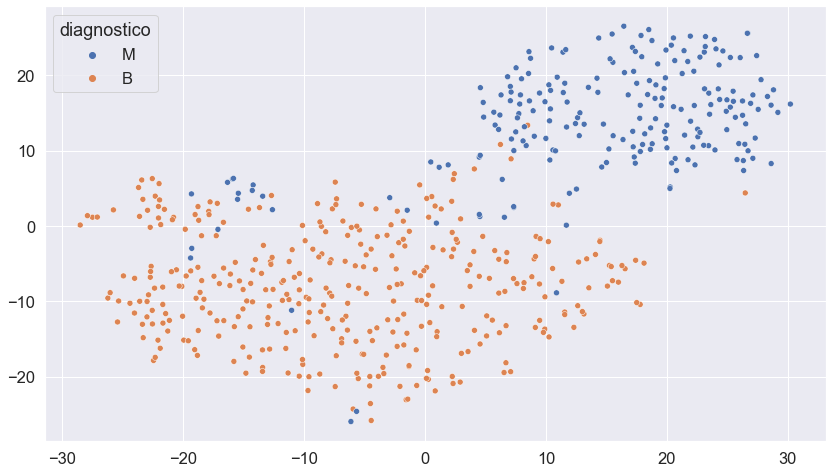

In [78]:
tsne = TSNE(n_components=2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x=valores_exames_v9[:,0] , y=valores_exames_v9[:,1] , hue=diagnostico)